# **Loading and Pre-Processing the Dataset**

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.express as px
from urllib.parse import urlparse

%matplotlib inline

In [ ]:
# Import the dataset
df=pd.read_csv('Dataset (1).csv')

In [ ]:
df

,URL,CLASS
0,https://linktr.ee/btinternetlee,Phishing
1,https://tinyurl.com/3j3k2mzd,Phishing
2,https://nevstr.weebly.com/,Phishing
3,https://link.account-update824.com/em=,Phishing
4,https://amazomerowihuiegarbcc.xyz/,Phishing
...,...,...
21576,http://codepen.io/api/oembed?url=http%3A%2F%2F...,Legitimate
21577,http://comicbook.com/2014/10/30/pee-wee-herman...,Legitimate
21578,http://comicbook.com/2014/12/25/top-ten-comic-...,Legitimate
21579,http://comicbook.com/2014/12/30/captain-americ...,Legitimate


In [ ]:
df1 = df.replace(['Phishing','Legitimate'],[0,1])

# **Feature Extraction for URL**

In [ ]:
# Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 0
  except:
    ip = 1
  return ip

# Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 0
  else:
    at = 1
  return at

# Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length =1
  else:
    length = 0
  return length

# Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def get_protocol(url):
    protocol = urlparse(url)
    if protocol.scheme == 'https':
        return 0
    else:
        return 1

# Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

# Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 0
    else:
      return 1
  else:
    return 1

#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"


# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 0
    else:
        return 1

# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 0          # phishing
    else:
        return 1          # legitimate

In [ ]:
ip = []
attherate = []
url_length= []
protocol = []
singleSlash= []
doubleSlash= []
tinyurl = []
hyphen= []

In [ ]:
def extract_all_features():
  counter = 0
  for url in df['URL']:
        counter = counter + 1
        ip.append(havingIP(url))
        attherate.append(haveAtSign(url))
        url_length.append(getLength(url))
        singleSlash.append(getDepth(url))
        doubleSlash.append(redirection(url))
        protocol.append(get_protocol(url))
        hyphen.append(prefixSuffix(url))
        tinyurl.append(tinyURL(url))

In [ ]:
extract_all_features()

In [ ]:
features_df = pd.DataFrame()
features_df["IP Check"] = ip
features_df["At The Rate"] = attherate
features_df["URL Length"] = url_length
features_df["Single Slash"] = singleSlash
features_df["Double Slash"] = doubleSlash
features_df["HTTP/HTTPS"] = protocol
features_df["Hyphen "] = hyphen
features_df["Tiny URL"] = tinyurl
features_df["Class"] = df1.CLASS

In [ ]:
features_df.head(20)

,IP Check,At The Rate,URL Length,Single Slash,Double Slash,HTTP/HTTPS,Hyphen,Tiny URL,Class
0,1,1,1,1,1,0,1,1,0
1,1,1,1,1,1,0,1,0,0
2,1,1,1,0,1,0,1,1,0
3,1,1,1,1,1,0,0,1,0
4,1,1,1,0,1,0,1,1,0
5,1,1,1,0,1,0,0,1,0
6,1,1,1,2,1,1,1,1,0
7,1,1,1,1,1,0,1,1,0
8,1,1,1,1,1,0,0,1,0
9,1,1,1,2,1,0,1,1,0


# **Biulding the CNN+LSTM model**

In [ ]:
X=features_df.iloc[:,0:8].values
y=features_df.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(10))

In [ ]:
X_train.shape

(17264, 8)

In [ ]:
X_test.shape

(4317, 8)

In [ ]:
y_train.shape

(17264,)

In [ ]:
y_test.shape

(4317,)

In [ ]:
!pip install -q keras

In [ ]:
#import all the necessary libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
X_train.shape[1],1

(8, 1)

In [ ]:
features_df.shape

(21581, 9)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *
from keras.layers import Dropout, Embedding, LSTM,Conv1D

In [ ]:
#max_chars = 20000
maxlen = 8
#embedding_vector_length=128

In [ ]:
model = Sequential()
model.add(Embedding(21581, 8))
model.add(Conv1D(128,activation = 'relu',kernel_size=3))
model.add(Conv1D(64,activation = 'relu',kernel_size=3))
model.add(Conv1D(32,activation = 'relu',kernel_size=3))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
#Summary of CNN+LSTM Model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 8)           172648    
                                                                 
 conv1d_9 (Conv1D)           (None, None, 128)         3200      
                                                                 
 conv1d_10 (Conv1D)          (None, None, 64)          24640     
                                                                 
 conv1d_11 (Conv1D)          (None, None, 32)          6176      
                                                                 
 lstm_3 (LSTM)               (None, 256)               295936    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 502,857
Trainable params: 502,857
Non-tr

In [ ]:
#from keras import callbacks
#es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1,validation_split=0.2)

scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of CNN+LSTM Neural Network {0:.2f}%'.format(scores[1]*100))

Epoch 1/30
432/432 [==============================] - 15s 24ms/step - loss: 0.3324 - accuracy: 0.8984 - val_loss: 0.3329 - val_accuracy: 0.8871
Epoch 2/30
432/432 [==============================] - 13s 30ms/step - loss: 0.3038 - accuracy: 0.8999 - val_loss: 0.3175 - val_accuracy: 0.8871
Epoch 3/30
432/432 [==============================] - 15s 34ms/step - loss: 0.2896 - accuracy: 0.9038 - val_loss: 0.3041 - val_accuracy: 0.8983
Epoch 4/30
432/432 [==============================] - 12s 28ms/step - loss: 0.2827 - accuracy: 0.9067 - val_loss: 0.3014 - val_accuracy: 0.8983
Epoch 5/30
432/432 [==============================] - 9s 20ms/step - loss: 0.2810 - accuracy: 0.9065 - val_loss: 0.2987 - val_accuracy: 0.8986
Epoch 6/30
432/432 [==============================] - 7s 17ms/step - loss: 0.2790 - accuracy: 0.9066 - val_loss: 0.2977 - val_accuracy: 0.8986
Epoch 7/30
432/432 [==============================] - 7s 16ms/step - loss: 0.2766 - accuracy: 0.9062 - val_loss: 0.2960 - val_accuracy: 0.

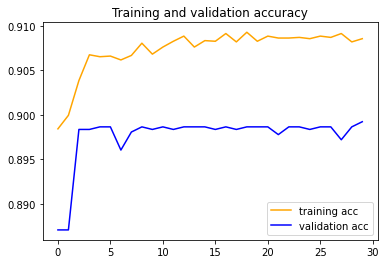

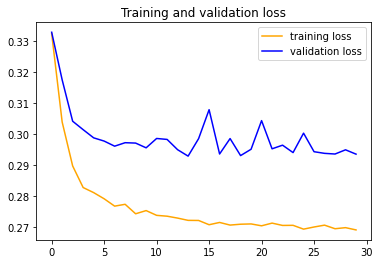

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('model_cnnlstm.h5')

In [ ]:
prediction=model.predict(X_test)

In [ ]:
pred = np.array([1 if i >= 0.5 else 0 for i in prediction])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,pred)*100
print(accuracy_score)

89.90039379198518


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, pred)*100}")

Precision Score of the classifier is: 90.09667531242631


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, pred)*100}")

Recall Score of the classifier is: 99.58300755798801


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, pred)*100}")

F1 Score of the classifier is: 94.60262441198316


AUC for our classifier is: 76.15283750325776


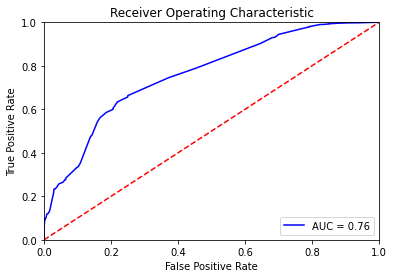

In [ ]:
from sklearn.metrics import roc_curve, auc

predict_prob=model.predict(X_test)

preds = predict_prob[:]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc*100}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.12      0.79      0.22        76
           1       1.00      0.90      0.95      4241

    accuracy                           0.90      4317
   macro avg       0.56      0.85      0.58      4317
weighted avg       0.98      0.90      0.93      4317



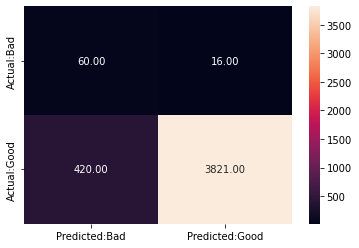

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(pred,y_test))
con  = pd.DataFrame(confusion_matrix(pred,y_test), columns = ['Predicted:Bad', 'Predicted:Good'], index = ['Actual:Bad', 'Actual:Good'])
sns.heatmap(con,annot=True,fmt='.2f')

In [ ]:
def generate_data_set(url):
  data_set = []

  try:
    ipaddress.ip_address(url)
    data_set.append(0)
  except:
    data_set.append(1)

  if "@" in url:
    data_set.append(0)
  else:
    data_set.append(1)

  if len(url) < 54:
    data_set.append(1)
  else:
    data_set.append(0)

  protocol = urlparse(url)
  if protocol.scheme == 'https':
    data_set.append(0)
  else:
    data_set.append(1)

  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  data_set.append(depth)

  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      data_set.append(0)
    else:
      data_set.append(1)
  else:
    data_set.append(1)

  if '-' in urlparse(url).netloc:
    data_set.append(0)
  else:
    data_set.append(1)


  shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                        r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                        r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                        r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                        r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                        r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                        r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                        r"tr\.im|link\.zip\.net"

  match=re.search(shortening_services,url)
  if match:
    data_set.append(0)
  else:
    data_set.append(1)

  return data_set

In [ ]:
url1 = "https://www.google.co.in/"

x = generate_data_set(url1)
x = np.array(x).reshape(1,8)
x

array([[1, 1, 1, 0, 0, 1, 1, 1]])

In [ ]:
y_pred = model.predict(x)
print(y_pred)

[[0.9873897]]


In [ ]:
if y_pred < 0.5:
    print("Predicted Class - Phishing")
else:
    print("Predicted Class - Benign")

Predicted Class - Benign
